In [1]:
# Import All the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.cluster import KMeans
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\lenovo\Dropbox\PC\Downloads\LungCancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
# Checking the shape
df.shape

(309, 16)

In [6]:
# Finding the duplicate values 
df.duplicated().sum()

33

In [7]:
# Remove the duplicate values from the dataset
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(276, 16)

In [9]:
# Finding the null values
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [10]:
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [11]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


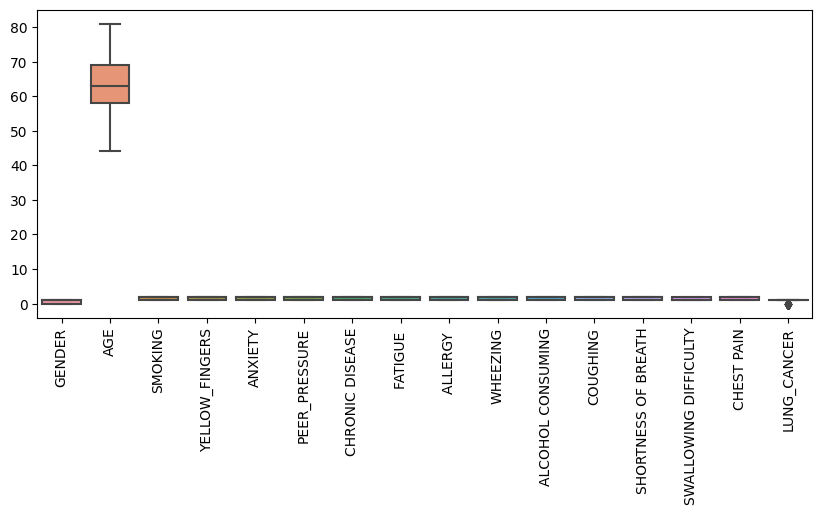

In [61]:
# def transform(data):
#     if data == 1:
#         return 0
#     elif data == 2:
#         return 1
#     else:
#         return data
plt.figure(figsize = (10,4))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

In [62]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [63]:
# df['SMOKING'] = df['SMOKING'].apply(transform)
# df['YELLOW_FINGERS'] = df['YELLOW_FINGERS'].apply(transform)
# df['ANXIETY'] = df['ANXIETY'].apply(transform)
# df['PEER_PRESSURE'] = df['PEER_PRESSURE'].apply(transform)
# df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].apply(transform)
# df['FATIGUE '] = df['FATIGUE '].apply(transform)
# df['ALLERGY '] = df['ALLERGY '].apply(transform)
# df['WHEEZING'] = df['WHEEZING'].apply(transform)
# df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].apply(transform)
# df['COUGHING'] = df['COUGHING'].apply(transform)
# df['SHORTNESS OF BREATH'] = df['SHORTNESS OF BREATH'].apply(transform)
# df['CHEST PAIN'] = df['CHEST PAIN'].apply(transform)
# df['SWALLOWING DIFFICULTY'] = df['SWALLOWING DIFFICULTY'].apply(transform)

In [64]:
df.shape

(272, 16)

In [75]:
df[df['AGE'] == 87]
df.drop(277,inplace = True)

In [ ]:
df.drop(22,inplace = True)
df.drop(238,inplace = True)
df.drop(261,inplace = True)

In [ ]:
df_data = df.select_dtypes(include = np.number)
for i in df_data:
    sns.boxplot(df_data[i])
    plt.title(f"Box Plot Of {i}")
    plt.show()

In [ ]:
sns.scatterplot(data = df,y = 'AGE',x = 'LUNG_CANCER')

In [ ]:
df.shape

In [ ]:
plt.figure(figsize = (10,8))
# sns.set(font_scale = 1)
sns.heatmap(df.corr(),annot = True,fmt = '.2f',annot_kws=None,linewidths=1,cmap="PiYG")
# plt.xticks(rotation = 70)
plt.show()


In [ ]:
x = df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY','CHEST PAIN']]
y = df['LUNG_CANCER']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [66]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.7454268292682927, 0.9444444444444444, 'x[7] <= 1.5\ngini = 0.238\nsamples = 217\nvalue = [30, 187]'),
 Text(0.5640243902439024, 0.8333333333333334, 'x[12] <= 1.5\ngini = 0.394\nsamples = 100\nvalue = [27, 73]'),
 Text(0.3719512195121951, 0.7222222222222222, 'x[8] <= 1.5\ngini = 0.491\nsamples = 51\nvalue = [22, 29]'),
 Text(0.2073170731707317, 0.6111111111111112, 'x[5] <= 1.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13]'),
 Text(0.12195121951219512, 0.5, 'x[1] <= 61.0\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.0975609756097561, 0.3888888888888889, 'x[6] <= 1.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.04878048780487805, 0.2777777777777778, 'x[1] <= 52.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.024390243902439025, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07317073170731707, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.14634146341463414, 0.2777777777777778, 'x[3] <= 1.5\ngini = 0.444\

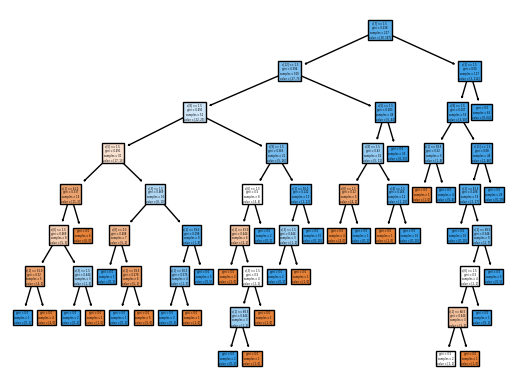

In [67]:
from sklearn import tree
tree.plot_tree(dtc,filled = True)

In [68]:
dtc_prediction = dtc.predict(x_test)
accuracy_score(dtc_prediction,y_test)

0.9090909090909091

In [69]:
# Support Vector Machine
svm_class = svm.SVC(kernel = 'linear')
svm_class.fit(x_train,y_train)

SVC(kernel='linear')

In [70]:
svm_class_prediction = svm_class.predict(x_test)
# svm_class_prediction
accuracy_score(svm_class_prediction,y_test)

0.8909090909090909

In [71]:
gs = GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [72]:
gs_prediction =  gs.predict(x_test)
accuracy_score(gs_prediction,y_test)

0.9090909090909091

In [73]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

##                                              LUNG CANCER PREDICTION

Dataset contains **'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'** These columns and the size of the data is **(309,16)**
       but after removing all the impurities from the data like duplicates and outliers the data size reduced to (**272,16**)

This study aims to develop a **classification model** to predict the likelihood of an individual suffering from lung cancer. The **target variable**, denoted as **LUNG_CANSER**, is categorical, indicating whether a person is diagnosed with lung cancer or not. To achieve this objective, various classification algorithms will be explored and evaluated to identify the most accurate and reliable predictive model.

### Columns Descriptions and How there impact on target variable.

Sure, let's explain each column and its potential impact on lung cancer:

1. **GENDER**: This column indicates the gender of the person and contains two categories: 'M' for male and 'F' for female. Gender may impact lung cancer risk due to differences in genetic factors, hormonal influences, and lifestyle choices between males and females. For instance, studies have shown that male individuals are generally more likely to smoke, which is a major risk factor for lung cancer.

2. **AGE**: Age refers to the age of the person, which is a crucial factor in lung cancer risk assessment. As age increases, the risk of developing lung cancer also tends to rise. This is because long-term exposure to risk factors like smoking or environmental pollutants accumulates over time, increasing the likelihood of cancer development.

3. **SMOKING**: This column indicates whether the person is a smoker ('Yes') or a non-smoker ('No'). Smoking is one of the most significant risk factors for lung cancer. Tobacco smoke contains carcinogens that can damage the cells in the lungs, leading to the development of cancerous cells. Smokers are at a much higher risk of developing lung cancer compared to non-smokers.

4. **YELLOW_FINGERS**: This column indicates whether the person has yellow fingers ('Yes') or not ('No'). Yellow fingers may be a sign of smoking and exposure to tobacco products. It is relevant in the context of lung cancer because it can be associated with tobacco use, which is a primary risk factor for lung cancer.

5. **ANXIETY**: Anxiety refers to a person's level of anxiety or stress. While anxiety itself may not directly cause lung cancer, chronic stress or anxiety may lead individuals to adopt unhealthy coping mechanisms, such as smoking or excessive alcohol consumption, which can contribute to lung cancer risk indirectly.

6. **PEER_PRESSURE**: Peer pressure reflects whether a person experiences pressure from their social circle to engage in certain behaviors, such as smoking. Peer pressure to smoke can increase the likelihood of initiating or continuing smoking habits, thereby elevating the risk of lung cancer.

7. **CHRONIC DISEASE**: This column indicates whether the person has any chronic diseases ('Yes') or not ('No'). Chronic diseases can affect overall health and immune function. Individuals with weakened immune systems or other chronic health issues may be more susceptible to developing cancer, including lung cancer.

8. **FATIGUE**: Fatigue refers to the person's level of exhaustion or tiredness. While fatigue itself may not directly cause lung cancer, it could impact an individual's ability to engage in healthy behaviors or seek medical attention promptly, potentially delaying cancer diagnosis and treatment.

9. **ALLERGY**: Allergy indicates whether the person has allergies ('Yes') or not ('No'). Allergies themselves are not directly linked to lung cancer, but allergic reactions may lead to chronic inflammation, which, over time, could contribute to cellular damage and increase the risk of cancer development.

10. **WHEEZING**: Wheezing indicates whether the person experiences wheezing ('Yes') or not ('No'). Wheezing can be a symptom of respiratory issues, such as asthma or chronic obstructive pulmonary disease (COPD), which are known risk factors for lung cancer.

11. **ALCOHOL CONSUMING**: This column indicates whether the person consumes alcohol ('Yes') or not ('No'). Excessive alcohol consumption is associated with an increased risk of several cancers, including lung cancer. Alcohol can interact with tobacco carcinogens, further elevating lung cancer risk in smokers.

12. **COUGHING**: Coughing indicates whether the person experiences persistent coughing ('Yes') or not ('No'). Chronic coughing can be a symptom of various respiratory conditions, some of which may be linked to lung cancer risk.

13. **SHORTNESS OF BREATH**: Shortness of breath indicates whether the person experiences difficulty breathing ('Yes') or not ('No'). Difficulty breathing may be a symptom of lung-related issues and warrants further investigation to assess potential lung cancer risk.

14. **SWALLOWING DIFFICULTY**: This column indicates whether the person experiences difficulty swallowing ('Yes') or not ('No'). While not directly related to lung cancer, swallowing difficulty may be associated with esophageal or other upper respiratory issues that could indirectly impact lung cancer risk.

15. **CHEST PAIN**: Chest pain indicates whether the person experiences pain in the chest area ('Yes') or not ('No'). Chest pain can be associated with various health conditions, including those affecting the lungs. Identifying and addressing the cause of chest pain is essential to assess lung cancer risk accurately.

16. **LUNG_CANCER**: This is the target variable we want to predict using the other features. It indicates whether the person has been diagnosed with lung cancer ('Yes') or not ('No').

In summary, several factors can impact lung cancer risk, including smoking, age, and chronic respiratory conditions. Identifying and understanding these risk factors can help in developing effective preventive strategies and early detection efforts for lung cancer. Machine learning models can be leveraged to analyze the relationships between these features and lung cancer risk, aiding in personalized healthcare interventions and public health initiatives.

## About The Models

- This is the Classification problem so, I use 
- **1] Decision Tree Classifier**
- **2] SVM**
- **3] Naive Bayes(GausssianNB)**

Certainly, here's a concise explanation of each model:

**1. Decision Tree Classifier:**
A Decision Tree is a flowchart-like structure used for classification. It divides data into subsets based on features, making decisions at each node to classify instances. It's easy to understand but can overfit without proper control.

**2. Support Vector Machine (SVM):**
SVM is a classification method that finds a line or surface to separate classes with the widest gap. It's effective for high-dimensional data and can handle nonlinear relationships using kernels. Tuning is crucial, and it might not perform well with noisy data.

**3. Naive Bayes (GaussianNB):**
Naive Bayes is a probabilistic classifier based on Bayes' theorem. It assumes feature independence, even though it's not always accurate. GaussianNB is a variant assuming features follow a normal distribution. It's fast, especially for text data, but struggles with correlated features.

## **Results**

Accuracy of different Models
- Decision Tree Classifier: **0.90**
- SVM : **0.89**
- Naive Bayes (GaussianNB): **0.90**


Certainly! Let's break down the reasons for the observed accuracy scores for each model individually:

**Decision Tree Classifier (Accuracy: 0.90):**
- Decision trees work by creating a set of decision rules based on the features. Given the simplicity of your dataset, a decision tree might be able to create effective rules to classify instances accurately.
- If the features have distinct thresholds that can easily separate the classes, the decision tree can partition the data well.
- Decision trees can also capture interactions between features, which might contribute to its ability to discern patterns in the data.
- However, if the decision tree is too deep or not properly pruned, it might overfit the training data, leading to high accuracy on the training set but poorer generalization to new data.

**Support Vector Machine (Accuracy: 0.89):**
- SVM aims to find a hyperplane that best separates the classes. If your data has a clear separation boundary, SVM can perform well.
- SVM is effective in high-dimensional spaces, and your dataset might have features that are contributing to a clear separation between the classes.
- The use of different kernels in SVM (like linear, polynomial, or RBF) can help capture various types of relationships in the data.
- An accuracy of 0.89 suggests that the SVM model found a good separation boundary, but it might still have some instances that are misclassified due to inherent noise or overlapping data points.

**Naive Bayes (GaussianNB) (Accuracy: 0.90):**
- Gaussian Naive Bayes is a probabilistic classifier that assumes features follow a Gaussian distribution. If the feature distributions for each class are distinct, GaussianNB can work well.
- If the attributes in your dataset are approximately normally distributed or can be transformed to be closer to normal distributions, GaussianNB will be effective.
- The independence assumption of Naive Bayes might be reasonable for your dataset, and this assumption might not be severely violated.
- An accuracy of 0.90 indicates that the class-conditional probabilities calculated by GaussianNB are assigning instances to the correct class with high confidence.

In summary, the similar high accuracy scores for all three models could be attributed to the dataset's characteristics, including well-separated classes, informative features, and relatively low noise. However, remember that accuracy alone might not fully reflect a model's performance. It's a good practice to assess other metrics and perform further analysis, like cross-validation, to ensure the models generalize well to unseen data.